## Зачем может быть нужен минимум функции и при чём тут градиент?

Рассмотрим простой случай.

Есть n точек (n>2), через которые хочется провести прямую. С условием, что возможна ситуация, когда некоторые (или все) точки не лежат непосредственно на прямой, но находятся достаточно "близко".

*например, зависимость между реальным ростом людей и записью в журнале хирурга военкомата, измеряющего рост с помощью 20 сантиметровой линейкой* 😄

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

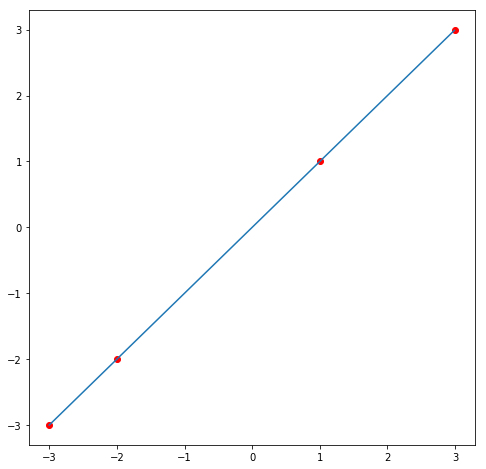

In [2]:
x_list = np.array([-3, -2, 1, 3])
y_list = np.array([-3, -2, 1, 3])

x = np.arange(-3, 3, 0.01)

plt.figure(figsize=(8, 8))
plt.plot(x_list, y_list, 'ro')
plt.plot(x, x)
plt.show()

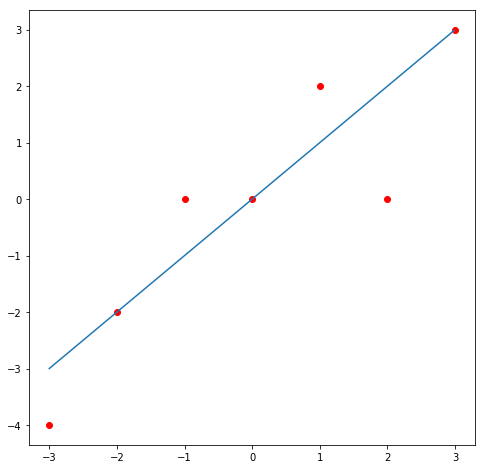

In [3]:
x_list = np.array([-3, -2, -1, 0, 1, 2, 3])
y_list = np.array([-4, -2, 0, 0, 2, 0, 3])

plt.figure(figsize=(8, 8))
plt.plot(x_list, y_list, 'ro')
plt.plot(x, x)
plt.show()

### Хороший выбор - евклидова метрика или **квадратичная ошибка:**

$$error(w) = \sum_{i=1}^n {(Y_i - P_i)}^2 $$

In [4]:
from scipy.optimize import minimize

In [5]:
# f(x) = w[0] + w[1]*x

def f(x, w):
    return w[0] + w[1]*x

def MSEf(w):
    return sum((y_list - f(x_list, w))**2)

minimize(MSEf, [0, 0])

      fun: 6.821428571428574
 hess_inv: array([[7.14285692e-02, 2.87226814e-09],
       [2.87226814e-09, 1.78571435e-02]])
      jac: array([5.96046448e-08, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-0.14285715,  0.96428571])

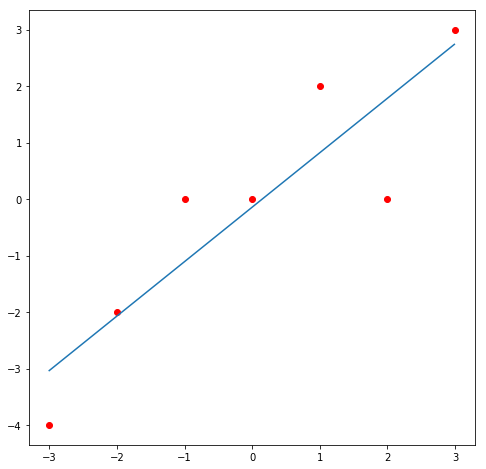

In [6]:
plt.figure(figsize=(8, 8))
plt.plot(x_list, y_list, 'ro')
plt.plot(x, f(x, minimize(MSEf, [0, 0]).x))
plt.show()

In [7]:
x_list = np.array([-3, -2, -1, 0, 1, 2, 3])
y_list = np.array([8, 3, 2, 0, 0, -1, -3])

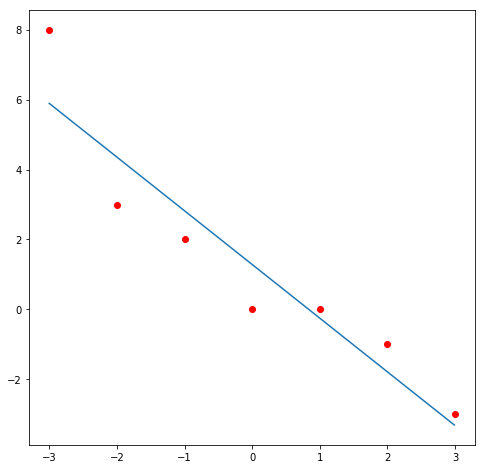

In [8]:
plt.figure(figsize=(8, 8))
plt.plot(x_list, y_list, 'ro')
plt.plot(x, f(x, minimize(MSEf, [0, 0]).x))
plt.show()

In [9]:
x_list = np.array([-3, -2, -1, 0, 1, 2, 3])
y_list = np.array([8, 4, 0, 0, 1, 5, 9])

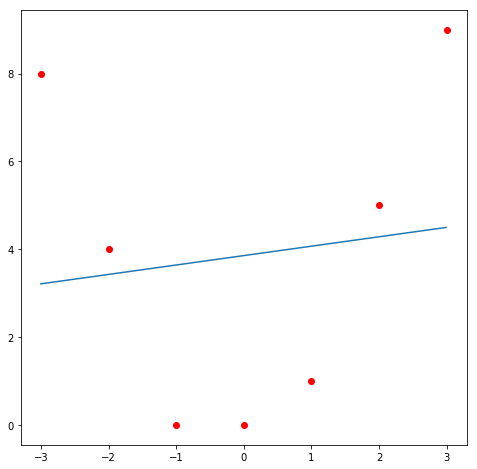

In [10]:
plt.figure(figsize=(8, 8))
plt.plot(x_list, y_list, 'ro')
plt.plot(x, f(x, minimize(MSEf, [0, 0]).x))
plt.show()

In [11]:
def g(x, w):
    return w[0] + w[1]*x + w[2]*x**2

def MSEg(w):
    return sum((y_list - g(x_list, w))**2)

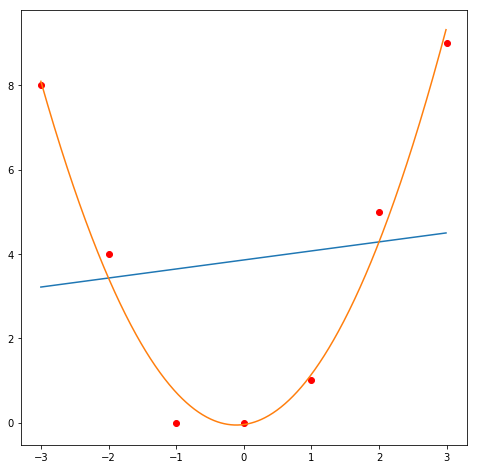

In [12]:
plt.figure(figsize=(8, 8))
plt.plot(x_list, y_list, 'ro')
plt.plot(x, f(x, minimize(MSEf, [0, 0]).x))
plt.plot(x, g(x, minimize(MSEg, [0, 0, 0]).x))
plt.show()

In [13]:
y_list = np.array([-28, -7, -2, -1, 2, 9, 26])

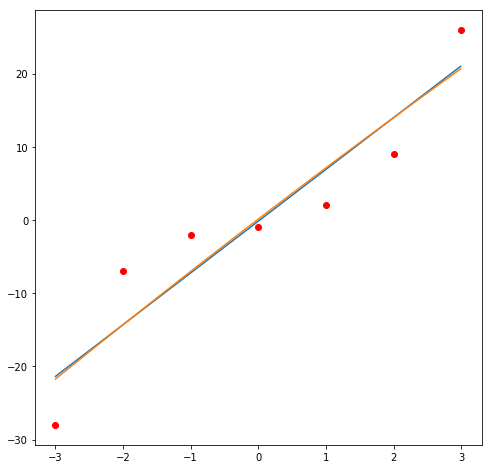

In [14]:
plt.figure(figsize=(8, 8))
plt.plot(x_list, y_list, 'ro')
plt.plot(x, f(x, minimize(MSEf, [0, 0]).x))
plt.plot(x, g(x, minimize(MSEg, [0, 0, 0]).x))
plt.show()

In [15]:
minimize(MSEg, [0, 0, 0])

      fun: 198.28571428571442
 hess_inv: array([[ 1.67086845e-01, -8.81714280e-06, -2.38699990e-02],
       [-8.81714280e-06,  1.78572944e-02,  1.23605187e-06],
       [-2.38699990e-02,  1.23605187e-06,  5.96108908e-03]])
      jac: array([ 0.00000000e+00,  1.90734863e-06, -1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 70
      nit: 11
     njev: 14
   status: 0
  success: True
        x: array([ 0.14285706,  7.07142861, -0.07142857])

In [16]:
def h(x, w):
    return w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3

def MSEh(w):
    return sum((y_list - h(x_list, w))**2)

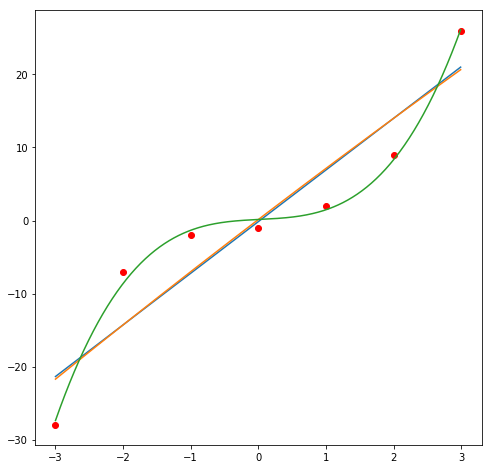

In [17]:
plt.figure(figsize=(8, 8))
plt.plot(x_list, y_list, 'ro')
plt.plot(x, f(x, minimize(MSEf, [0, 0]).x))
plt.plot(x, g(x, minimize(MSEg, [0, 0, 0]).x))
plt.plot(x, h(x, minimize(MSEh, [0, 0, 0, 0]).x))
plt.show()

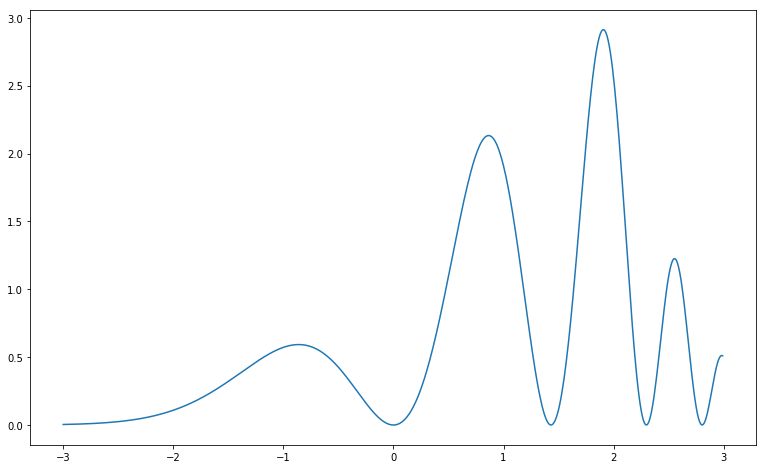

In [18]:
def k(x):
    return 5*np.sin(np.exp(x*0.8))**2*x**2/(np.exp(x**2/2))

plt.figure(figsize=(13, 8))
plt.plot(x, k(x))

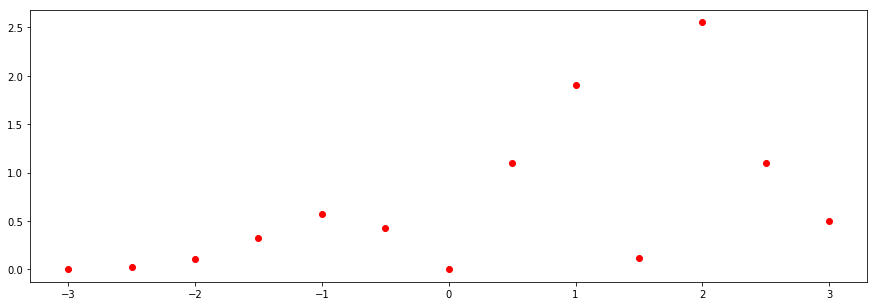

In [19]:
x_list4 = np.arange(-3, 3.1, 0.5)
y_list4 = k(x_list4)

plt.subplots(figsize=(15,5))
plt.plot(x_list4, y_list4, 'ro')

In [20]:
def l(x, w):
    return w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3 + w[4]*x**4

def MSEl(w):
    return sum((y_list4 - h(x_list4, w))**2)

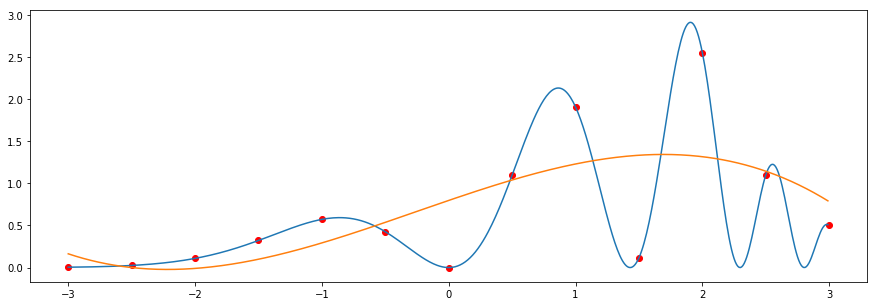

In [21]:
plt.subplots(figsize=(15,5))
plt.plot(x_list4, y_list4, 'ro')
plt.plot(x, k(x))

plt.plot(x, l(x, minimize(MSEl, [0, 0, 0, 0, 0]).x))

In [22]:
minimize(MSEl, [0, 0, 0, 0, 0])

      fun: 4.374840972717854
 hess_inv: array([[ 8.74125890e-02,  6.44341316e-10, -1.39860124e-02,
        -2.29422970e-10,  0.00000000e+00],
       [ 6.44341309e-10,  7.16921951e-02,  5.18232284e-10,
        -9.71250953e-03,  0.00000000e+00],
       [-1.39860124e-02,  5.18232285e-10,  3.99601021e-03,
        -5.33495061e-10,  0.00000000e+00],
       [-2.29422968e-10, -9.71250953e-03, -5.33495067e-10,
         1.55400157e-03,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00]])
      jac: array([-5.96046448e-08, -1.78813934e-07, -1.19209290e-07, -5.96046448e-08,
        0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 63
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([ 0.79730495,  0.51445416, -0.03601527, -0.04568381,  0.        ])

## Визуализация методов оптимизации

http://www.benfrederickson.com/numerical-optimization/

# P.S.


### Зачем нужна метрика?

Предположим, мы имеем 2 алгоритма, предсказывающих качество вина по имеющимся данным о его характеристикам:

- Predict1 - всегда ставит 5
- Predict2 - более сложный алогритм, который иногда сильно не угалывает (см. 18 строку)

Тогда предсказания обоих алгоритмов можно внести в таблицу:

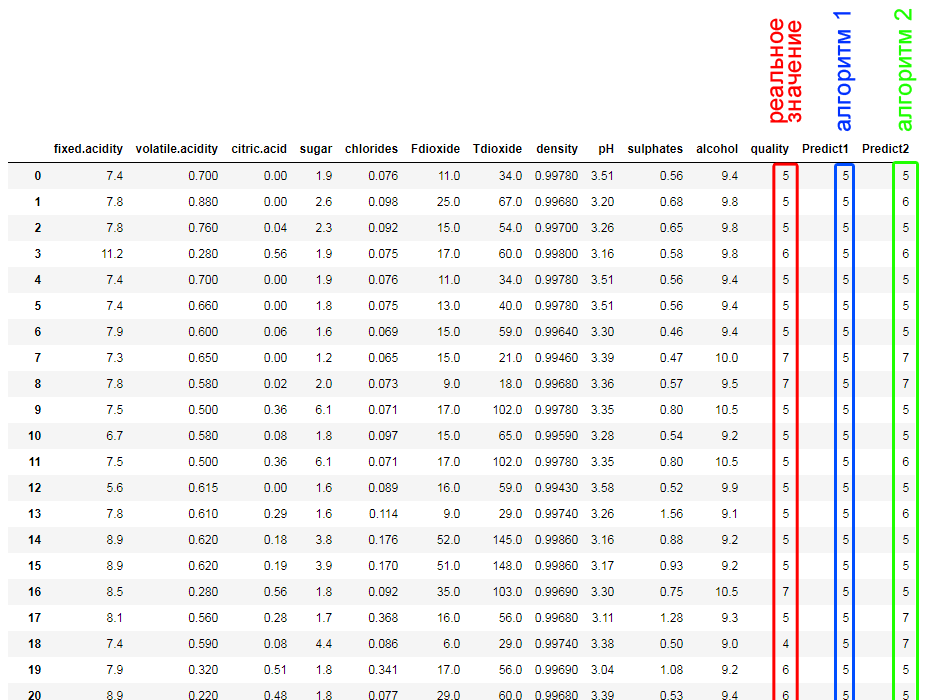

**Какой из алгоритмов лучше Predict1 или Predict2?**

Если представить правильные значения и предсказания обоих алгоритмов в виде векторов:

- $Y_{ист} = [5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, ...]$
- $P_{pr1} = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...]$
- $P_{pr3} = [5, 6, 5, 6, 5, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 5, 5, 7, 7, 5, 5, ...]$

, то в метрика (т.е. расстояние) между вектором предсказания и вектором правильных ответов и будет мерой качества алгоритма. Чем ближе значение прогнозного и истинного значения для каждой точки, тем точнее алгоритм, тем меньше метрика, тем меньше расстояние между векторами.

- Манхэттонская метрика: $\|{\mathbf  {p}}-{\mathbf  {y}}\|=\sum _{{i=1}}^{n}|p_{i}-y_{i}|$

- Евклидова метрика: $\|{\mathbf  {p}}-{\mathbf  {y}}\|_{2}={\sqrt  {\sum _{{i}}^{n}(p_{i}-y_{i})^{2}}}$